# Aggression Lunging Simulation and Force Measurement


In [255]:
#Importing Functions
from pathlib import Path
import pickle
import numpy as np
from tqdm import trange
from flygym.preprogrammed import all_leg_dofs
from flygym.util import get_data_path
import matplotlib.pyplot as plt
from flygym import Fly, Camera,SingleFlySimulation
from IPython.display import Video
from flygym import Simulation
from flygym.preprogrammed import all_tarsi_links

save_dir = Path("outputs")
save_dir.mkdir(exist_ok=True)

To start, set up the time scale and load the data

In [256]:
#Setting up the time steps and load the data
run_time = 0.5
timestep = 1e-4
actuated_joints = all_leg_dofs

data_path = get_data_path("flygym", "data")
render_mode="saved"
render_playspeed=0.2, 
draw_contacts=True
#Data is for lunging fly0
with open(data_path / "behavior" / "210902_pr_fly1.pkl", "rb") as f:
    data = pickle.load(f)
#Data1 is for stationary fly 
with open(data_path / "behavior" / "210902_pr_fly1.pkl", "rb") as f:
    data1=pickle.load(f)


# Simulation Manipulation Data
Then modify the data in fly0. The data was modifyies by observing the lunging video. 
- np.linspace(statring phase, endphase, # of frames)
- each linspace list is one action that is actuated linearly
- data["join name"]=np.concatenate([transitioning, squading, standing, leaning, attacking])

In [257]:
data["joint_LFCoxa"]=np.concatenate([np.linspace(0.6, 0, 200),np.linspace(0, 0, 100),np.linspace(0, 0, 100),np.linspace(0, 0, 100),np.linspace(0, 0, 100)]).tolist()
data["joint_LFCoxa_roll"]=np.concatenate([np.linspace(1, 0.8, 200),np.linspace(0.8, 0.8, 100),np.linspace(0.8, 0.8, 100),np.linspace(0.8, 0.8,100),np.linspace(0.8, 0.3, 100)]).tolist()
data["joint_LFCoxa_yaw"]=np.concatenate([np.linspace(0.5, 1.5, 200),np.linspace(1.5,1.5, 100),np.linspace(1.5,1.5, 100),np.linspace(1.5,1.5, 100),np.linspace(1.5, 1.5, 100)]).tolist()
data["joint_LFFemur"]=np.concatenate([np.linspace(-2.8, -1.5, 200),np.linspace(-1.5,-1.5, 100),np.linspace(-1.5,-1.5, 100),np.linspace(-1.5,-1.5,100),np.linspace(-1.5, -1.5, 100)]).tolist()
data["joint_LFFemur_roll"]=np.concatenate([np.linspace(1.5, -1.5, 200),np.linspace(-1.5,-1.5, 100),np.linspace(-1.5,-1.5,100),np.linspace(-1.5,-1.5, 100),np.linspace(-1.5,-1.5, 100)]).tolist()
data["joint_LFTibia"]=np.concatenate([np.linspace(2.1, -1.17,200),np.linspace(-1.17,-1.1, 100),np.linspace(-1.1,-1.1 ,100),np.linspace(-1.1,-1.1, 100),np.linspace(-1.1, -0.9, 100)]).tolist()
data["joint_LFTarsus1"]=np.concatenate([np.linspace(0, 0, 200),np.linspace(0,-0.21 ,100),np.linspace(-0.2,0, 100),np.linspace(0,0, 100),np.linspace(0, -0.6, 100)]).tolist()

data["joint_LMCoxa"]=np.concatenate([np.linspace(0.11, 0.11, 200),np.linspace(0.11,0.12, 100),np.linspace(0.12,0.5, 100),np.linspace(0.5,0.8, 100),np.linspace(0.8, -0.6, 100)]).tolist()
data["joint_LMCoxa_roll"]=np.concatenate([np.linspace(2, 0.1, 200),np.linspace(0.1,0.1 ,100),np.linspace(0.1,0.1,100),np.linspace(0.1,0.1 ,100),np.linspace(0.1, 0.1, 100)]).tolist()
data["joint_LMCoxa_yaw"]=np.concatenate([np.linspace(0.16, 0.4, 200),np.linspace(0.4,0.4, 100),np.linspace(0.4,0.4, 100),np.linspace(0.4,0.6, 100),np.linspace(0.6, 0.4, 100)]).tolist()
data["joint_LMFemur"]=np.concatenate([np.linspace(-1.45, -1.68, 200),np.linspace(-1.68,-0.798 , 100),np.linspace(-0.798,-0.528, 100),np.linspace(-0.528,-0.528,100),np.linspace(-0.428, -0.498, 100)]).tolist()
data["joint_LMFemur_roll"]=np.concatenate([np.linspace(0.37, 0, 200),np.linspace(0,0 , 100,),np.linspace(0,0, 100),np.linspace(0,0 , 100),np.linspace(0, 0,100)]).tolist()
data["joint_LMTibia"]=np.concatenate([np.linspace(1.84, 1.74, 200),np.linspace(1.74,0.5, 100),np.linspace(0.5,0.2, 100),np.linspace(0.2,0.2, 100),np.linspace(0.2,1.5, 100)]).tolist()
data["joint_LMTarsus1"]=np.concatenate([np.linspace(-0.81, -0.2, 200),np.linspace(-0.2,-0.33 ,100),np.linspace(-0.33,-0.1, 100),np.linspace(-0.1,-0.1 ,100),np.linspace(-0.1, -1.2, 100)]).tolist()

data["joint_LHCoxa"]=np.concatenate([np.linspace(0.4, 0.4, 200),np.linspace(0.4,0.21, 100),np.linspace(0.21,-0.2, 100),np.linspace(-0.2,-0.2, 100),np.linspace(-0.2, 0.6, 100)]).tolist()
data["joint_LHCoxa_roll"]=np.concatenate([np.linspace(2.5, 2.5, 200),np.linspace(2.5,2.5,100),np.linspace(2.5,2.5, 100),np.linspace(2.5,2.5, 100),np.linspace(2.5, 2.61, 100)]).tolist()
data["joint_LHCoxa_yaw"]=np.concatenate([np.linspace(0.2,0.2, 200),np.linspace(0.2,0.2,100),np.linspace(0.2,0.2, 100),np.linspace(0.2, 0.2, 100),np.linspace(0.2, 0.4, 100)]).tolist()
data["joint_LHFemur"]=np.concatenate([np.linspace(-1.89, -1.89, 200),np.linspace(-1.89,-1.82 ,100),np.linspace(-1.82,-1.2, 100),np.linspace(-1.2,-1.2 ,100),np.linspace(-1.2, -0.2, 100)]).tolist()
data["joint_LHFemur_roll"]=np.concatenate([np.linspace(0.18, 0, 200),np.linspace(0,0 , 100),np.linspace(0,0, 100),np.linspace(0,0 , 100),np.linspace(0, 0, 100)]).tolist()
data["joint_LHTibia"]=np.concatenate([np.linspace(2, 2.15, 200),np.linspace(2.07,2.15, 100),np.linspace(2.15,0.1, 100),np.linspace(0.1,0.1, 100),np.linspace(0.1, 0.1, 100)]).tolist()
data["joint_LHTarsus1"]=np.concatenate([np.linspace(-0.5, -0.9, 200),np.linspace(-0.9,-1.1, 100),np.linspace(-1.1,-0.2, 100),np.linspace(-0.2,-0.2,100),np.linspace(-0.2, -0.2, 100)]).tolist()

data["joint_RFCoxa"]=data["joint_LFCoxa"]
data["joint_RFCoxa_roll"]=[-x for x in data["joint_LFCoxa_roll"]]
data["joint_RFCoxa_yaw"]=[-x for x in data["joint_LFCoxa_yaw"]]
data["joint_RFFemur"]=data["joint_LFFemur"]
data["joint_RFFemur_roll"]=[-x for x in data["joint_LFFemur_roll"]]
data["joint_RFTibia"]=data["joint_LFTibia"]
data["joint_RFTarsus1"]=data["joint_LFTarsus1"]

data["joint_RMCoxa"]=data["joint_LMCoxa"]
data["joint_RMCoxa_roll"]=[-x for x in data["joint_LMCoxa_roll"]]
data["joint_RMCoxa_yaw"]=[-x for x in data["joint_LMCoxa_yaw"]]
data["joint_RMFemur"]=data["joint_LMFemur"]
data["joint_RMFemur_roll"]=[-x for x in data["joint_LMFemur_roll"]]
data["joint_RMTibia"]=data["joint_LMTibia"]
data["joint_RMTarsus1"]=data["joint_LMTarsus1"]

data["joint_RHCoxa"]=data["joint_LHCoxa"]
data["joint_RHCoxa_roll"]=[-x for x in data["joint_LHCoxa_roll"]]
data["joint_RHCoxa_yaw"]=[-x for x in data["joint_LHCoxa_yaw"]]
data["joint_RHFemur"]=data["joint_LHFemur"]
data["joint_RHFemur_roll"]=[-x for x in data["joint_LHFemur_roll"]]
data["joint_RHTibia"]=data["joint_LHTibia"]
data["joint_RHTarsus1"]=data["joint_LHTarsus1"]


The data for both flies are interpolated

In [258]:
target_num_steps = int(run_time / timestep)
data_block = np.zeros((len(actuated_joints), target_num_steps))
input_t = np.arange(len(data["joint_LFCoxa"])) * data["meta"]["timestep"]
output_t = np.arange(target_num_steps) * timestep

for i, joint in enumerate(actuated_joints):
    data_block[i, :] = np.interp(output_t, input_t, data[joint])


data_block1 = np.zeros((len(actuated_joints), target_num_steps))
input_t = np.arange(len(data1["joint_LFCoxa"])) * data1["meta"]["timestep"]
output_t = np.arange(target_num_steps) * timestep
for i, joint in enumerate(actuated_joints):
    data_block1[i, :] = np.interp(output_t, input_t, data1[joint])

Create plot for each joint angles to observe the behavior (for sanity check)

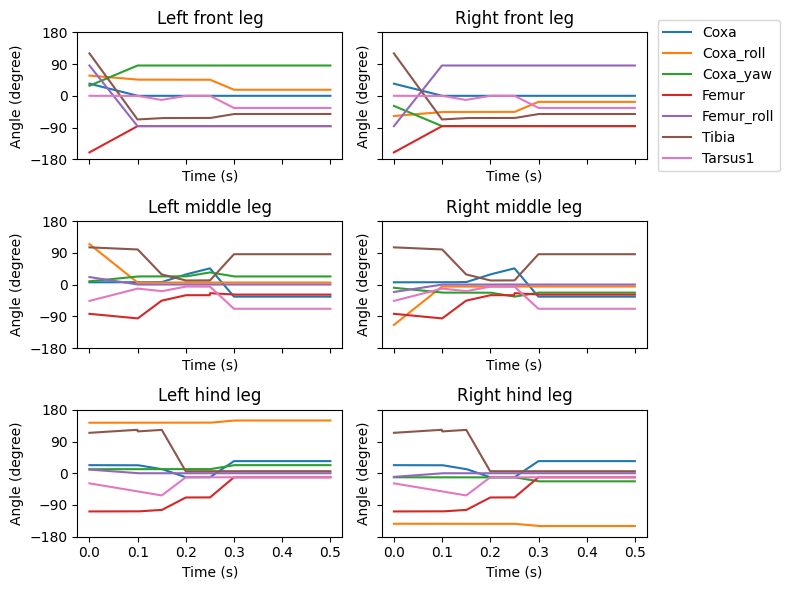

In [259]:

fig, axs = plt.subplots(
    3, 2, figsize=(8, 6), sharex=True, sharey=True, tight_layout=True
)
legs = [
    f"{side} {pos} leg"
    for pos in ["front", "middle", "hind"]
    for side in ["Left", "Right"]
]
for i, leg in enumerate(legs):
    ax = axs.flatten()[i]
    leg_code = f"{leg.split()[0][0]}{leg.split()[1][0]}".upper()
    for j, dof in enumerate(actuated_joints):
        if dof.split("_")[1][:2] != leg_code:
            continue
        ax.plot(output_t, np.rad2deg(data_block[j, :]), label=dof[8:])
    ax.set_ylim(-180, 180)
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("Angle (degree)")
    ax.set_yticks([-180, -90, 0, 90, 180])
    ax.set_title(leg)
    if leg == "Right front leg":
        ax.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)

# Multi-camera Simulation

In [260]:

import imageio

fly = Fly(
    spawn_pos=(0, 0, 1),
    actuated_joints=actuated_joints,
)

cameras = [
    Camera(fly=fly, camera_id=f"Animat/camera_{side}", window_size=(256, 256))
    for side in ["left", "right", "top", "front"]
]

sim = SingleFlySimulation(
    fly=fly,
    cameras=cameras,
)
obs, info = sim.reset()

with imageio.get_writer(save_dir / "multiview.mp4", fps=cameras[0].fps) as writer:
    for i in trange(target_num_steps):
        joint_pos = data_block[:, i]
        action = {"joints": joint_pos}
        obs, reward, terminated, truncated, info = sim.step(action)
        images = sim.render()

        if all(i is not None for i in images):
            frame = np.concatenate(images, axis=1)
            writer.append_data(frame)
        

100%|██████████| 5000/5000 [00:35<00:00, 139.47it/s]


In [261]:

Video(str(save_dir / "multiview.mp4"))


# Multi-fly simulation
Two flies will be spawned in this simulation and the lunging fly0 will be lunging at the target fly1

In [262]:
#Spawn the flies
fly0 = Fly(name="0", spawn_pos=(0, 0, 0))
fly1 = Fly(name="1",spawn_pos=(2.1, 0.15, 0),spawn_orientation=(0.0, 0.0, 2*np.pi / 2))

Enabling the collision 

In [263]:
def _add__collision(geo1,geo2):
    fly_0= fly0.model.find("geom", geo1)
    fly_1= fly1.model.find("geom", geo2)
    print(f"{geo1}_{geo2}")
    fly0.model.contact.add(
    "pair",
    name=f"{geo1}_{geo2}",
    geom1=fly_0,
    geom2=fly_1,
    solref=fly0.contact_solref,
    solimp=fly0.contact_solimp,
    )
    print("check")

_add__collision("Head","Thorax")
_add__collision("LFTarsus5","Head")
_add__collision("RFTarsus5","Head")
_add__collision("LFTarsus5","Thorax")
_add__collision("RFTarsus5","Thorax")
_add__collision("LFTarsus5","A1A2")
_add__collision("RFTarsus5","A1A2")
_add__collision("LFTarsus5","RWing")
_add__collision("RFTarsus5","RWing")
_add__collision("LFTarsus5","LWing")
_add__collision("RFTarsus5","LWing")

#Manually add desired collison pairs using the function. It can be freely adjusted

Head_Thorax
check
LFTarsus5_Head
check
RFTarsus5_Head
check
LFTarsus5_Thorax
check
RFTarsus5_Thorax
check
LFTarsus5_A1A2
check
RFTarsus5_A1A2
check
LFTarsus5_RWing
check
RFTarsus5_RWing
check
LFTarsus5_LWing
check
RFTarsus5_LWing
check


Rendering the video 
- please note that this section may need to be commented out in order to run the following sections of force measurement

In [264]:

cam = Camera(fly=fly0, camera_id="Animat/camera_top_right")

sim = Simulation(
    flies=[fly0, fly1],
    cameras=[cam],
)
obs, info = sim.reset()

for i in trange(target_num_steps):
    joint_pos = data_block[:, i]
    joint_pos_steady=data_block1[:, 30]
    action = {
        "0": {"joints": joint_pos},
        "1": {"joints": joint_pos_steady}
        
    }
    obs, reward, terminated, truncated, info = sim.step(action)
    sim.render()

cam.save_video(save_dir / "two_flies_transition.mp4")

'\ncam = Camera(fly=fly0, camera_id="Animat/camera_top_right")\n\nsim = Simulation(\n    flies=[fly0, fly1],\n    cameras=[cam],\n)\nobs, info = sim.reset()\n\nfor i in trange(target_num_steps):\n    joint_pos = data_block[:, i]\n    joint_pos_steady=data_block1[:, 30]\n    action = {\n        "0": {"joints": joint_pos},\n        "1": {"joints": joint_pos_steady}\n        \n    }\n    obs, reward, terminated, truncated, info = sim.step(action)\n    sim.render()\n\ncam.save_video(save_dir / "two_flies_transition.mp4")\n\n'

In [265]:

Video(str(save_dir / "two_flies_transition.mp4"))


'\nVideo(str(save_dir / "two_flies_transition.mp4"))\n'

# Force Measurement 
The following code will add sensors on the Tarsus5 of each front legs and measure the force exerted.
Please note that the above section (video rendering) may need to be commented out in order to run this simulation

100%|██████████| 5000/5000 [01:21<00:00, 61.31it/s] 


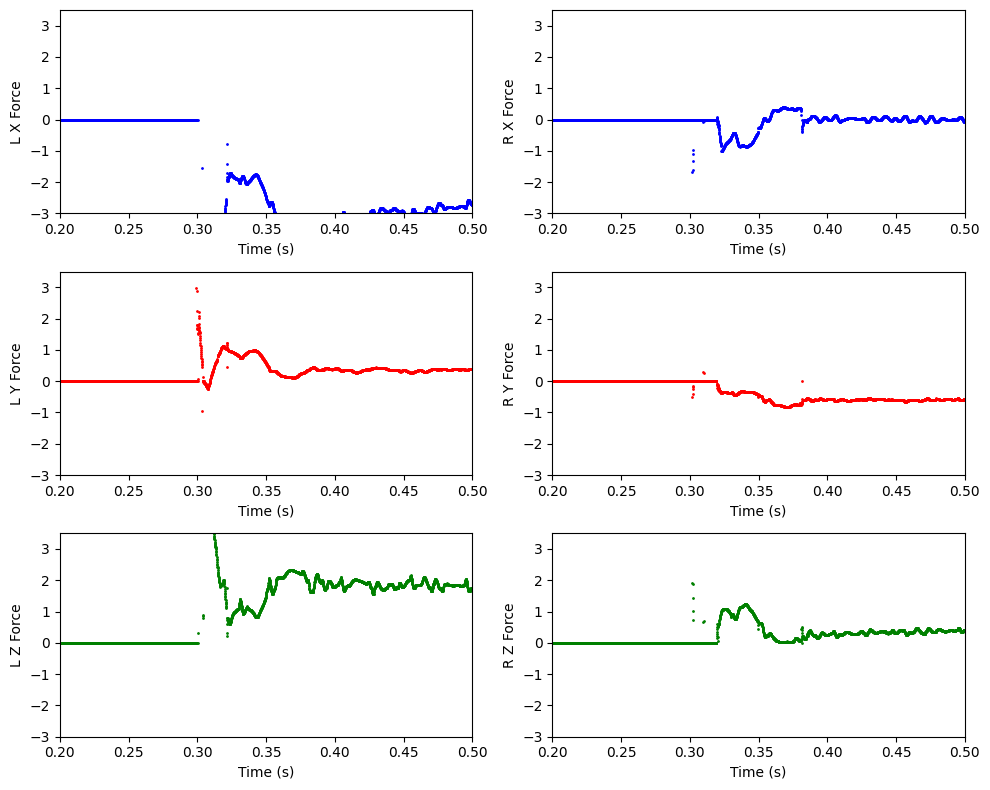

In [268]:
'''
fig, axes = plt.subplots(3, 2, figsize=(10, 8))
axes = axes.flatten()

cam = Camera(fly=fly0, camera_id="Animat/camera_top_right")
sim = Simulation(
    flies=[fly0, fly1],
    cameras=[cam],
)
obs, info = sim.reset()

for i in trange(target_num_steps):
    joint_pos = data_block[:, i]
    joint_pos_steady=data_block1[:, 30]
    action = {
        "0": {"joints": joint_pos},
        "1": {"joints": joint_pos_steady}
    
    }
    obs, reward, terminated, truncated, info = sim.step(action)
    output_t =i * timestep
    x=fly0.get_observation(sim)

    axes[0].plot(output_t, x["contact_forces"][4][0], ".",color='blue',markersize=2)
    axes[1].plot(output_t, x["contact_forces"][19][0], ".",color='blue',markersize=2)
    axes[2].plot(output_t, x["contact_forces"][4][1], ".",color='red',markersize=2)
    axes[3].plot(output_t, x["contact_forces"][19][1], ".",color='red',markersize=2)
    axes[4].plot(output_t, x["contact_forces"][4][2], ".",color='green',markersize=2)
    axes[5].plot(output_t, x["contact_forces"][19][2], ".",color='green',markersize=2)
# Set the same y-axis limits for all subplots
for ax in axes:
    ax.set_ylim(-3, 3.5)
    ax.set_xlim(0.2, 0.5)
    ax.set_xlabel("Time (s)")

axes[0].set_ylabel("L X Force")
axes[1].set_ylabel("R X Force")
axes[2].set_ylabel("L Y Force")
axes[3].set_ylabel("R Y Force")
axes[4].set_ylabel("L Z Force")
axes[5].set_ylabel("R Z Force")

plt.tight_layout()
plt.show()
'''

# Result Plot
Plot the data for changing the actuation speed 
- The speed is modified by editing the number of frame of the attacking stage in fly0 data 
- The data is recorded and plotted

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(8, 5))
axes = axes.flatten()

frame_attack=[50,70,90,95,100,120,140,160,180,200,250]
time_attack=[p*timestep for p in frame_attack ]
x_fc=[5.973747730255127,5.79703426361084 ,5.938783645629883, 5.44185733795166,2.433032274246216, 1.913029432296753, 1.9220800399780273,1.7685006856918335,1.9276121854782104,2.1362204551696777,2.152804374694824]
y_fc=[1.9892784357070923, 2.335672616958618, 1.9018288254737854,1.2525831460952759,1.2059139013290405,1.3589835166931152,1.211272001266479,1.1249918937683105,1.2440143823623657,1.1659531593322754,0.9314832091331482 ]
z_fc=[8.265935897827148, 8.052144050598145,  7.445169925689697, 6.354724884033203, 4.071165084838867,3.676180601119995, 3.2750461101531982,3.071955442428589,3.117661952972412,3.362067222595215,3.2867891788482666]
total_fc = [np.sqrt(x**2 + y**2 + z**2) for x, y, z in zip(x_fc, y_fc, z_fc)]

axes[0].plot(time_attack,x_fc, ".",color='blue',markersize=6)

axes[1].plot(time_attack, y_fc, ".",color='red',markersize=6)

axes[2].plot(time_attack, z_fc, ".",color='green',markersize=6)

axes[3].plot(time_attack, total_fc, ".",color='black',markersize=6)

for ax in axes:
    ax.set_xlim(0, 0.03)
    ax.set_xlabel("Time (s)")


axes[0].set_ylabel("R X Force")
axes[0].set_ylim(0,8)
axes[1].set_ylabel("R Y Force")
axes[1].set_ylim(0,3)
axes[2].set_ylabel("R Z Force")
axes[2].set_ylim(0,10)
axes[3].set_ylabel("Total Force")
axes[3].set_ylim(0,15)
plt.tight_layout()
plt.show()

Similarly, plot the data for changing the "change in Coxa phase angle" in the attacking stage

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(8, 5))
axes = axes.flatten()

angle_c=[0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2]

x_fc=[2.8797078132629395 ,3.30214262008667, 2.6387202739715576, 2.8881866931915283 ,1.768500685691833,1.5027546882629395,1.1326626539230347,1.0773729085922241 ]
y_fc=[2.5241074562072754 ,1.7957911491394043,1.3787535429000854,1.1878039836883545,1.1249918937683105,1.366973638534546,1.1552237272262573,0.8758237957954407]
z_fc=[4.013697624206543,3.6335411071777344, 3.2249200344085693, 3.5255818367004395,3.071955442428589,2.817990303039551,2.3113842010498047,2.0399162769317627 ]
total_fc = [np.sqrt(x**2 + y**2 + z**2) for x, y, z in zip(x_fc, y_fc, z_fc)]


print (total_fc)


axes[0].plot(angle_c,x_fc, ".",color='blue',markersize=6)

axes[1].plot(angle_c, y_fc, ".",color='red',markersize=6)

axes[2].plot(angle_c, z_fc, ".",color='green',markersize=6)

axes[3].plot(angle_c, total_fc, ".",color='black',markersize=6)

for ax in axes:
    ax.set_xlim(0, 1)
    ax.set_xlabel("Coxa Angle change")


axes[0].set_ylabel("R X Force")
axes[0].set_ylim(0,5)
axes[1].set_ylabel("R Y Force")
axes[1].set_ylim(0,5)
axes[2].set_ylabel("R Z Force")
axes[2].set_ylim(0,5)
axes[3].set_ylabel("Total Force")
axes[3].set_ylim(0,8)
plt.tight_layout()
plt.show()